## Regresion lineal

#### Librerias

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge


### Analisis del dataset

       country  rank  score      high       low       gdp    family    lifexp  \
0       Norway     1  7.537  7.594445  7.479556  1.616463  1.533524  0.796667   
1      Denmark     2  7.522  7.581728  7.462272  1.482383  1.551122  0.792566   
2      Iceland     3  7.504  7.622030  7.385970  1.480633  1.610574  0.833552   
3  Switzerland     4  7.494  7.561772  7.426227  1.564980  1.516912  0.858131   
4      Finland     5  7.469  7.527542  7.410458  1.443572  1.540247  0.809158   

    freedom  generosity  corruption  dystopia  
0  0.635423    0.362012    0.315964  2.277027  
1  0.626007    0.355280    0.400770  2.313707  
2  0.627163    0.475540    0.153527  2.322715  
3  0.620071    0.290549    0.367007  2.276716  
4  0.617951    0.245483    0.382612  2.430182  

             rank       score        high         low         gdp      family  \
count  155.000000  155.000000  155.000000  155.000000  155.000000  155.000000   
mean    78.000000    5.354019    5.452326    5.255713    0.984

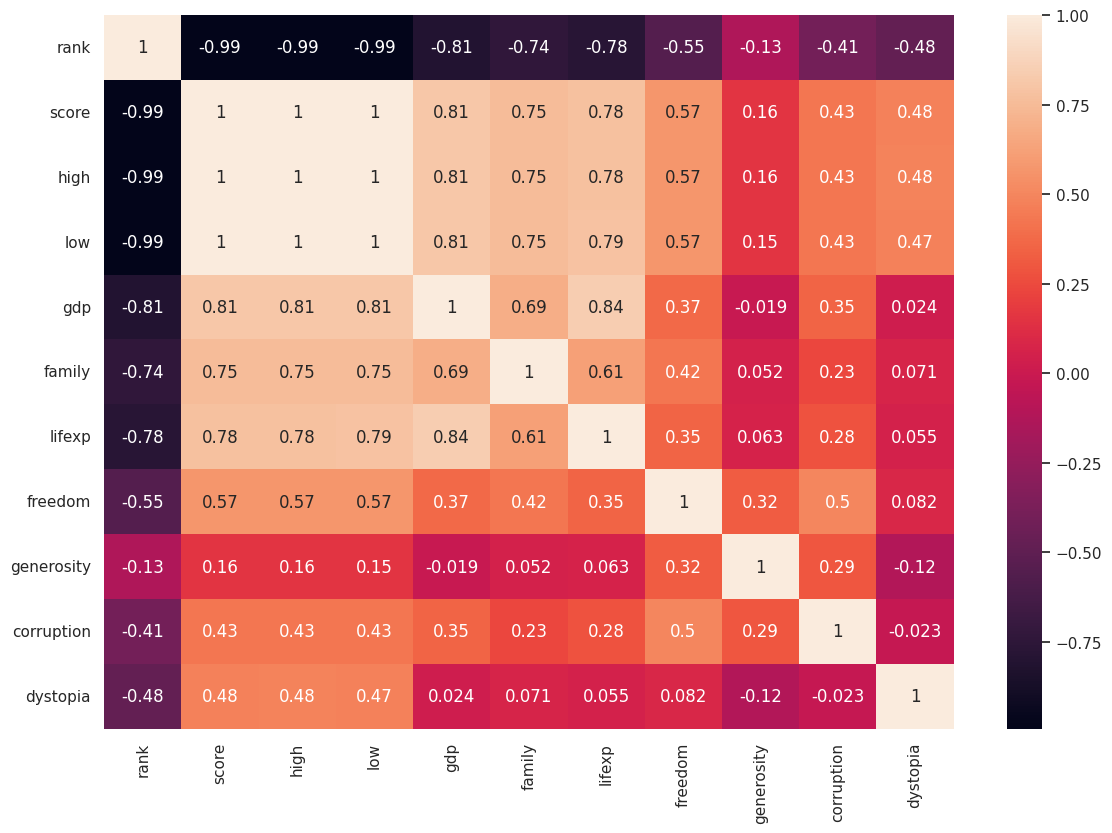

In [96]:
df = pd.read_csv("/home/alejandro/proyectos/platzi/ia/machine_learning/regre_ro/Datasets/felicidad.csv")

print(df.head())
print()
print(df.describe())
print()
print(df.info())

df_num = df.drop(["country"], axis=1)
cor = (df_num.corr())

sns.heatmap(cor, annot=True)
sns.set(rc={'figure.figsize': (13.7, 9.27)})

plt.show()

### Preprocesamiento

In [97]:
df_feactures = df.drop(["country"], axis=1)
df_target = df["score"]

x_train, x_test, y_train, y_test = train_test_split(df_feactures, df_target, test_size=0.2, random_state=42)

x_train = StandardScaler().fit_transform(x_train)
y_train = StandardScaler().fit_transform(y_train.values.reshape(-1,1))
x_test = StandardScaler().fit_transform(x_test)
y_test = StandardScaler().fit_transform(y_test.values.reshape(-1,1))

### Entrenamiento

In [98]:
model = LinearRegression().fit(x_train,y_train)
predict_linear = model.predict(x_test)

model = Lasso(alpha=0.5).fit(x_train,y_train)
predict_lasso = model.predict(x_test)

model = Ridge(alpha=1).fit(x_train,y_train)
predict_ridge = model.predict(x_test)

linear_error = mean_squared_error(y_test, predict_linear)
print(f"El error lineal es: {linear_error}")

lasso_error = mean_squared_error(y_test, predict_lasso)
print(f"El error lineal es: {lasso_error}")

ridge_error = mean_squared_error(y_test, predict_ridge)
print(f"El error lineal es: {ridge_error}")



El error lineal es: 1.3627754815314123e-21
El error lineal es: 0.24999999999999997
El error lineal es: 0.003961379342496083


#### Graficos 

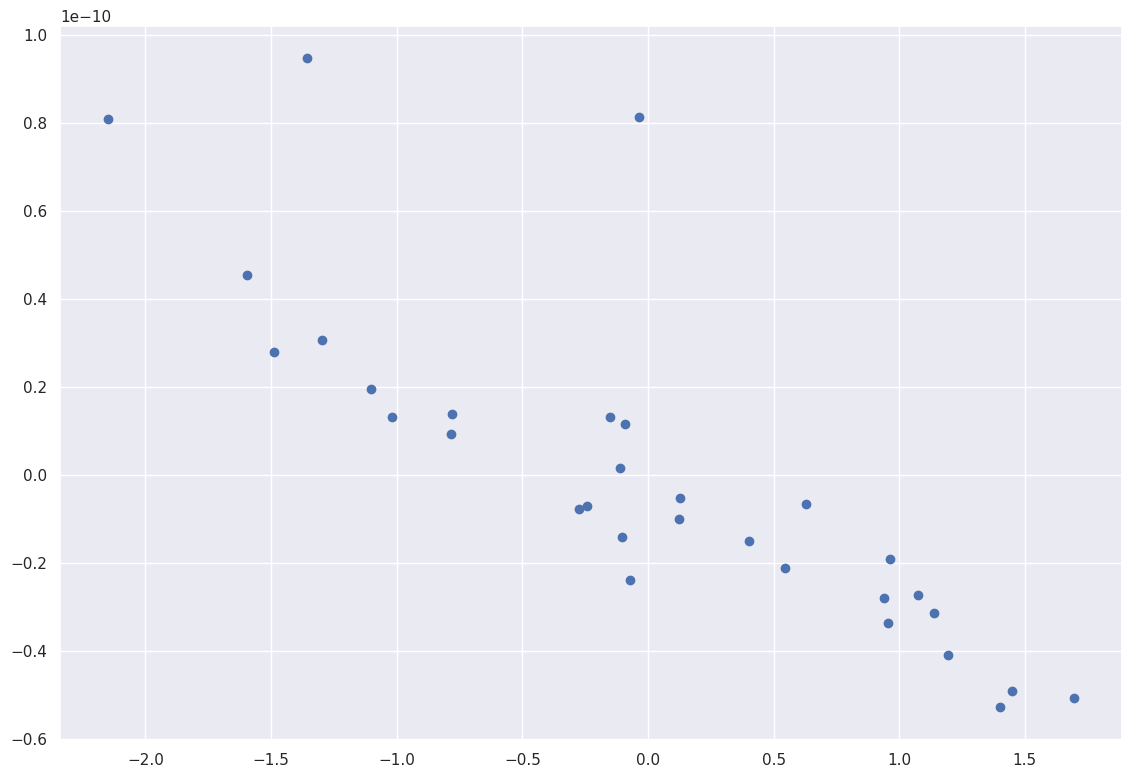

[[ 1.15187027e-11]
 [ 2.79651857e-11]
 [-2.79767320e-11]
 [-1.90643057e-11]
 [ 9.37849798e-12]
 [-1.48919210e-11]
 [-7.12577219e-12]
 [ 4.54993820e-11]
 [ 8.09237122e-11]
 [-5.26736987e-12]
 [-6.65523192e-12]
 [ 9.47169010e-11]
 [-2.37781322e-11]
 [ 8.13560747e-11]
 [-5.28181943e-11]
 [-3.14275272e-11]
 [-3.36884964e-11]
 [ 1.31337718e-11]
 [ 1.38178358e-11]
 [ 3.07411874e-11]
 [-4.09001721e-11]
 [-4.90345542e-11]
 [-5.07112130e-11]
 [-2.71835887e-11]
 [-1.00852104e-11]
 [ 1.96438421e-11]
 [-7.81874565e-12]
 [-2.11307638e-11]
 [ 1.67338365e-12]
 [-1.40307627e-11]
 [ 1.32205358e-11]]


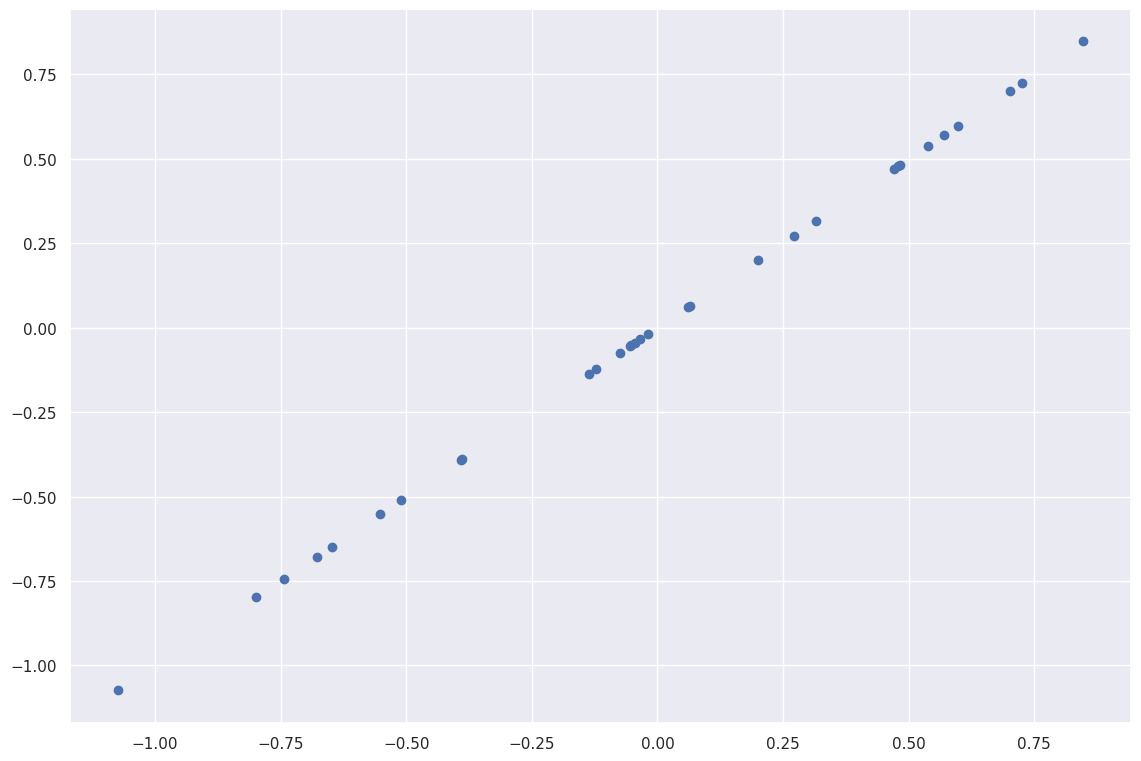

[[-0.04500075]
 [-0.74382823]
 [ 0.47001704]
 [ 0.48230042]
 [-0.39156303]
 [ 0.20066363]
 [-0.12220962]
 [-0.79822539]
 [-1.07372048]
 [ 0.06467086]
 [ 0.31516086]
 [-0.67758657]
 [-0.03491107]
 [-0.01824094]
 [ 0.70120499]
 [ 0.57003762]
 [ 0.47791345]
 [-0.07527002]
 [-0.38936955]
 [-0.64819462]
 [ 0.5972363 ]
 [ 0.72533267]
 [ 0.84728744]
 [ 0.53757488]
 [ 0.06160007]
 [-0.55124483]
 [-0.13668627]
 [ 0.27216957]
 [-0.05509044]
 [-0.05201965]
 [-0.51000836]]


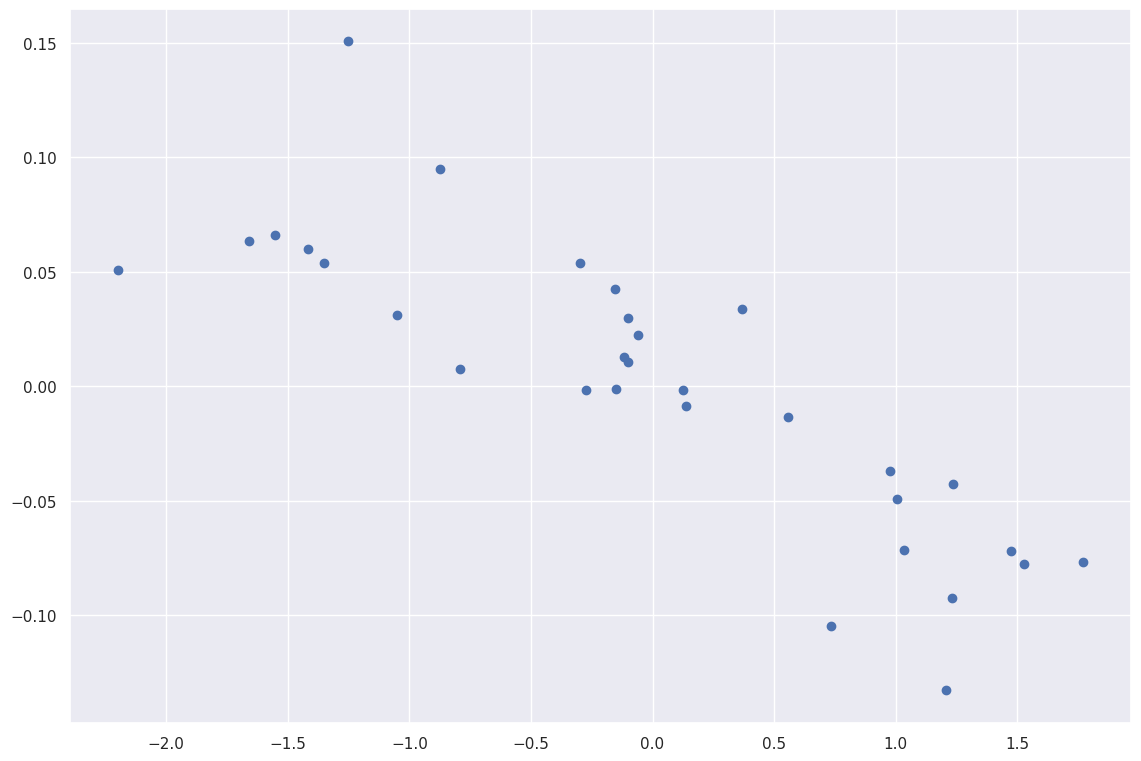

[[ 0.01060258]
 [ 0.06581289]
 [-0.03694231]
 [-0.07141564]
 [ 0.00737996]
 [ 0.03390907]
 [ 0.05367943]
 [ 0.06359762]
 [ 0.05088947]
 [-0.0088177 ]
 [-0.10453906]
 [ 0.05978458]
 [ 0.02973392]
 [ 0.02251674]
 [-0.07181621]
 [-0.09241734]
 [-0.04935128]
 [-0.00104686]
 [ 0.0949716 ]
 [ 0.05371355]
 [-0.04269464]
 [-0.07778208]
 [-0.07659515]
 [-0.132811  ]
 [-0.00154204]
 [ 0.15052759]
 [-0.00186433]
 [-0.0136575 ]
 [ 0.04249732]
 [ 0.01253082]
 [ 0.031146  ]]


In [105]:
residual = np.subtract(y_test, predict_linear)
plt.scatter(predict_linear, residual)
plt.show()
print(residual)

residual = np.subtract(y_test, predict_lasso.reshape(-1,1))
plt.scatter(predict_lasso, residual.reshape(-1))
plt.show()
print(residual)

residual = np.subtract(y_test, predict_ridge)
plt.scatter(predict_ridge, residual)
plt.show()
print(residual)